# An analysis of the 2016 Christmas Appeal Tests

In the 2016 Christmas appeal, we conducted a test on the ask amounts of the donation coupon. We compared our usual 'standard' 100%, 200% and 300% of the donor's highest gift in the last 12 months or Last Donation amount (whichever was higher) to an inflated ask amounts of 125%, 300% and 500%.

This document provides an analysis of the test. We explore 3 main components:

* Overall response rates between standard and inflated.
* Distribution and effect on donation amounts between standard and inflated.
* How donations to the inflated ask packs compared to the standard ask amounts.

In [1]:
import numpy as np
import pandas as pd
import qgrid # library to be able to scroll through dataframe like an excel file!
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder

from ggplot import *
import matplotlib.pyplot as plt

# plot graphs inline of the notebook
%matplotlib inline

df = pd.read_csv('xm16.csv')
qgrid.show_grid(df.head(5))

In [2]:
df.shape

(14369, 42)

## Comparison of Response Rates

* Throughout this analysis, we consider the traditional card packs: **Pack A (std ask) vs. Pack C (inflated ask)** and Australiana packs **Pack B (std ask) vs. Pack D (inflated ask)**.

In [3]:
# Create column indicating donation
df['donated'] = np.where( df['DateOfPayment'].notnull(), 1, 0)

In [4]:
grouped = pd.DataFrame(pd.crosstab(df['PACK'], df['donated']))

grouped['response_rate'] = grouped.iloc[:,1]/grouped.iloc[:,0]
grouped

donated,0,1,response_rate
PACK,,,
A,4562,514,0.112670
B,4314,506,0.117293
C,1730,377,0.217919
D,1739,363,0.208741
E,117,37,0.316239
F,89,21,0.235955


* We see that for both traditional and australiana card packs (Pack C and D), **the inflated ask packs proportionally have a much greater response rate compared to the standard ask packs, 20%+ vs. 11%**.


* We use a standard proportions test to determine whether this observed difference is statistically significant.

In [66]:
from scipy.stats import norm, chi2_contingency
import statsmodels.api as sm

s1 = len(df.loc[((df['PACK'].isin(['C','D'])) & (df['donated']==1)),:].index)
n1 = len(df.loc[df['PACK'].isin(['C','D']),:].index)

s2 = len(df.loc[((df['PACK'].isin(['A','B'])) & (df['donated']==1)),:].index)
n2 = len(df.loc[df['PACK'].isin(['A','B']),:].index)

print(s1, n1)
print(s2, n2)

p1 = s1/n1
p2 = s2/n2
p = (s1 + s2)/(n1+n2)
z = (p1-p2)/ ((p*(1-p)*((1/n1)+(1/n2)))**0.5)

print(p1, p2, p)
print(p1-p2)
print('test stat: ' + str(z))

# p-value is approximately 1, so looking to the right of this 1-p_value=0, so very significant.
p_value = norm.cdf(z)

print(p_value)

740 4209
1020 9896
0.1758137324780233 0.103071948261924 0.12477844735909252
0.07274178421609928
test stat: 11.96156266012287
1.0


* **The proportions test tells us that the observed difference between inflated ask packs and standard ask packs are statistically significant. I.e. there is almost no chance this difference is due to chance.**

## Comparison of Donation Amounts between Standard ask and Inflated Ask

Here we plot the distribution of donation amounts between the packs and observe the differences:

(0, 150)

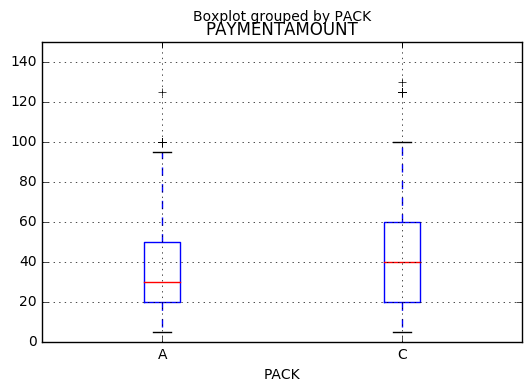

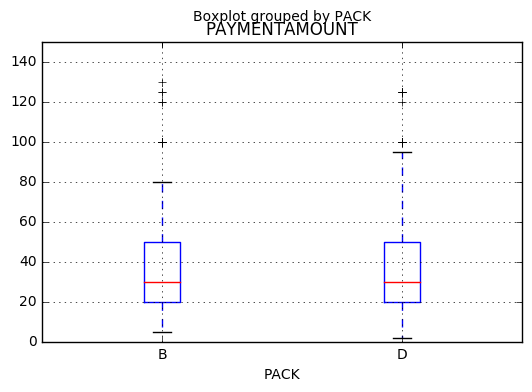

In [67]:
df.loc[((df['PAYMENTAMOUNT']>0) & (df['PACK'].isin(['A','C']))),:].boxplot(column='PAYMENTAMOUNT', by='PACK').set_ylim([0,150])
df.loc[((df['PAYMENTAMOUNT']>0) & (df['PACK'].isin(['B','D']))),:].boxplot(column='PAYMENTAMOUNT', by='PACK').set_ylim([0,150])

We look at the summary statistics of the donation amounts for each pack below:

In [66]:
print('Variance of Donations Pack A:')
print(df.loc[((df['PAYMENTAMOUNT']>0) & (df['PACK'].isin(['A']))),'PAYMENTAMOUNT'].describe())
print('Variance of Donations Pack C:')
print(df.loc[((df['PAYMENTAMOUNT']>0) & (df['PACK'].isin(['C']))),'PAYMENTAMOUNT'].describe())

print('Variance of Donations Pack B:')
print(df.loc[((df['PAYMENTAMOUNT']>0) & (df['PACK'].isin(['B']))),'PAYMENTAMOUNT'].describe())
print('Variance of Donations Pack D:')
print(df.loc[((df['PAYMENTAMOUNT']>0) & (df['PACK'].isin(['D']))),'PAYMENTAMOUNT'].describe())

Variance of Donations Pack A:
count     513.000000
mean       59.230019
std       125.494497
min         5.000000
25%        20.000000
50%        30.000000
75%        50.000000
max      2000.000000
Name: PAYMENTAMOUNT, dtype: float64
Variance of Donations Pack C:
count    377.000000
mean      54.312997
std       59.226554
min        5.000000
25%       20.000000
50%       40.000000
75%       60.000000
max      500.000000
Name: PAYMENTAMOUNT, dtype: float64
Variance of Donations Pack B:
count    506.000000
mean      46.966403
std       52.693179
min        5.000000
25%       20.000000
50%       30.000000
75%       50.000000
max      500.000000
Name: PAYMENTAMOUNT, dtype: float64
Variance of Donations Pack D:
count    362.000000
mean      49.276243
std       59.804619
min        2.000000
25%       20.000000
50%       30.000000
75%       50.000000
max      600.000000
Name: PAYMENTAMOUNT, dtype: float64


* We see from the boxplots above and the 5-number summaries that **in general, the inflated ask packs performed well, yielding better response rates and generally higher donation amounts.** 


* Comparing Pack A and C, we see that 50% of pack A donated at \$30 and above whilst 50% of Pack C donated at \$40 and above. The mean donation amount from Pack A is dragged up by the maximum gift of \$2,000.


* Comparing pack B and D, we see that the variance of these donations are similar between the packs, but in general, pack D did yield slightly higher donation amounts. We see that the means of Pack B and D are \$47 and \$49 respectively, without outliers in either pack.

In [54]:
# Lets look at the spread of donations of pack A taking out the $2,000 max gift.
print('Variance of Donations Pack A:')
print(df.loc[((df['PAYMENTAMOUNT']>0) & (df['PACK'].isin(['A'])) & (df['PAYMENTAMOUNT']<2000)),'PAYMENTAMOUNT'].describe())

Variance of Donations Pack A:
count     512.000000
mean       55.439453
std        91.620293
min         5.000000
25%        20.000000
50%        30.000000
75%        50.000000
max      1580.000000
Name: PAYMENTAMOUNT, dtype: float64


* We see that the next highest gift is also quite high at \$1,580, still increasing the average gift. But the average gift drops about \$4, to levels similar to pack C.


* **We conclude that the average gift from the inflated ask packs are higher than standard ask packs.**

## Comparsion of donations to inflated packs to standard ask amounts

We now explore in further detail how donation amounts from each pack compared to the Ask levels:

In [12]:
# Create new column to analyse responses to ask levels
df['response_level'] = 'Did Not Donate'

df.loc[ df['PAYMENTAMOUNT'] < df['ASK1'], 'response_level' ] = 'Below Ask 1'
df.loc[ df['PAYMENTAMOUNT'] == df['ASK1'], 'response_level' ] = 'Ask 1'
df.loc[ ((df['PAYMENTAMOUNT'] > df['ASK1']) & (df['PAYMENTAMOUNT'] < df['ASK2'])) , 'response_level' ] = 'Btw Ask1 and Ask2'
df.loc[ df['PAYMENTAMOUNT'] == df['ASK2'], 'response_level' ] = 'Ask 2'
df.loc[ ((df['PAYMENTAMOUNT'] > df['ASK2']) & (df['PAYMENTAMOUNT'] < df['ask3'])) , 'response_level' ] = 'Btw Ask2 and Ask3'
df.loc[ df['PAYMENTAMOUNT'] == df['ask3'], 'response_level' ] = 'Ask 3'
df.loc[ df['PAYMENTAMOUNT'] > df['ask3'], 'response_level' ] = 'Above Ask 3'

df['response_level'].value_counts()

Did Not Donate       12577
Below Ask 1            957
Ask 1                  730
Btw Ask1 and Ask2       57
Ask 2                   41
Above Ask 3              5
Ask 3                    1
Btw Ask2 and Ask3        1
Name: response_level, dtype: int64

In [68]:
df.loc[((df['donated']==1) & (df['response_level']=='Did Not Donate')),['Ask1', 'Ask2', 'PAYMENTAMOUNT', 'donated', 'response_level']].head(3)

,Ask1,Ask2,PAYMENTAMOUNT,donated,response_level


These records are from those who donated without ask amounts. Let's update these response levels:

In [71]:
df.loc[((df['donated']==1) & (df['response_level']=='Did Not Donate')), 'response_level'] = 'Unsolicited Donation'

In the summary table below, we look at where donations to each pack fell in terms of ask amounts:

In [72]:
pd.crosstab(df['response_level'], df['PACK'])

PACK,A,B,C,D,E,F
response_level,,,,,,
Above Ask 3,4,1,0,0,0,0
Ask 1,262,269,94,75,20,10
Ask 2,21,14,2,0,3,1
Ask 3,1,0,0,0,0,0
Below Ask 1,201,203,266,271,12,4
Btw Ask1 and Ask2,15,18,10,13,1,0
Btw Ask2 and Ask3,0,1,0,0,0,0
Did Not Donate,4562,4314,1730,1739,117,89
Unsolicited Donation,10,0,5,4,1,6


We look at the same summary by proportions:

In [73]:
# Crosstab percentages by columns
pd.crosstab(df.loc[df['donated']==1,'response_level'], df.loc[df['donated']==1,'PACK']).apply(lambda c: c/c.sum(), axis=0)

PACK,A,B,C,D,E,F
response_level,,,,,,
Above Ask 3,0.007782,0.001976,0.000000,0.000000,0.000000,0.000000
Ask 1,0.509728,0.531621,0.249337,0.206612,0.540541,0.476190
Ask 2,0.040856,0.027668,0.005305,0.000000,0.081081,0.047619
Ask 3,0.001946,0.000000,0.000000,0.000000,0.000000,0.000000
Below Ask 1,0.391051,0.401186,0.705570,0.746556,0.324324,0.190476
Btw Ask1 and Ask2,0.029183,0.035573,0.026525,0.035813,0.027027,0.000000
Btw Ask2 and Ask3,0.000000,0.001976,0.000000,0.000000,0.000000,0.000000
Unsolicited Donation,0.019455,0.000000,0.013263,0.011019,0.027027,0.285714


And graphically:

//anaconda/lib/python3.5/site-packages/ggplot/ggplot.py:602: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  fill_levels = self.data[[fillcol_raw, fillcol]].sort(fillcol_raw)[fillcol].unique()


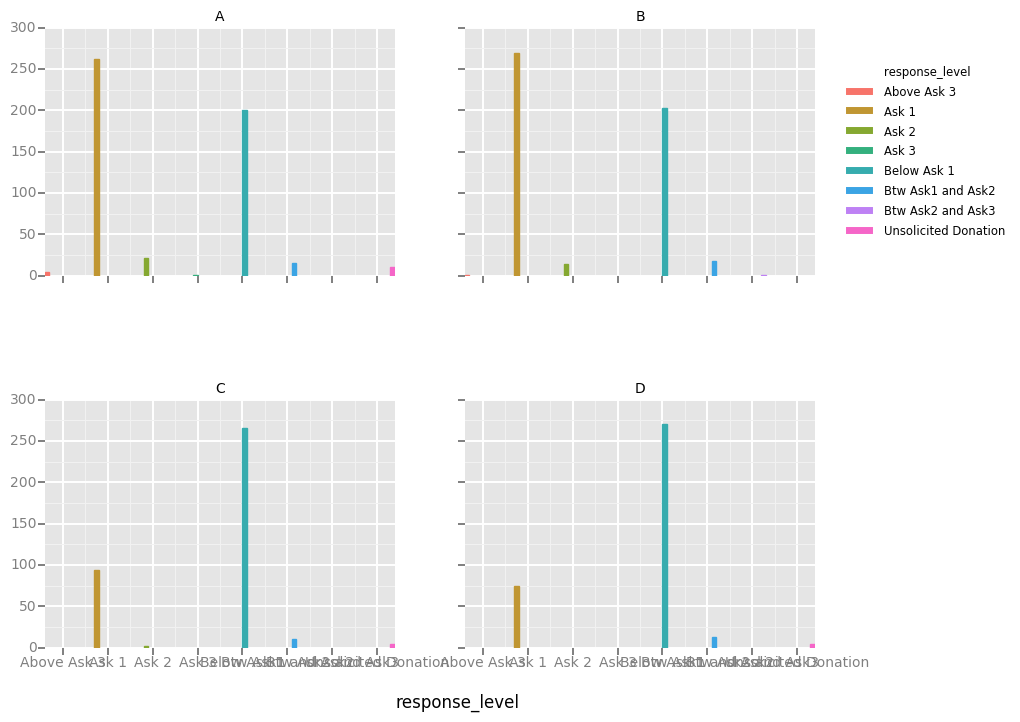

<ggplot: (-9223372036553912923)>

In [30]:
ggplot(aes(x='response_level', fill='response_level'), data=df.loc[((df['donated']==1) & (df['PACK'].isin(['A','B','C','D']))),:]) +\
        geom_bar() +\
        facet_wrap('PACK')

We can see from the above cross tab and barplots that the **standard ask packs significantly have greater proportion of donors giving at the Ask1 level compared to the inflated ask packs (50%+ vs. 20-25%).** So a natural question is what are the donation amounts from the inflated ask packs which are below ask1 and how do they compare to the standard ask packs?


We explore this question below, and compare the donation amounts from the inflated ask packs to what the standard ask amounts would have been, and observe where the donations lie (in particular, whether they were above the standard ask amounts).

In [69]:
inflated_df = inflated_df.loc[inflated_df['PACK'].isin(['C','D']),:]

# what the if_standardask levels are.
inflated_df.loc[:,'if_standardask1'] = inflated_df['ASK1']/1.25
inflated_df.loc[:,'if_standardask2'] = inflated_df['ASK2']/1.25
inflated_df.loc[:,'if_standardask3'] = inflated_df['ask3']/1.25

# Create new column to analyse responses to ask levels
inflated_df['if_response_level'] = 'Did Not Donate'

inflated_df.loc[ inflated_df['PAYMENTAMOUNT'] < inflated_df['if_standardask1'], 'if_response_level' ] = 'Below if_standardask1'
inflated_df.loc[ inflated_df['PAYMENTAMOUNT'] == inflated_df['if_standardask1'], 'if_response_level' ] = 'if_standardask1'
inflated_df.loc[ ((inflated_df['PAYMENTAMOUNT'] > inflated_df['if_standardask1']) & (inflated_df['PAYMENTAMOUNT'] < inflated_df['if_standardask2'])) , 'if_response_level' ] = 'Btw if_standardask1 and if_standardask2'
inflated_df.loc[ inflated_df['PAYMENTAMOUNT'] == inflated_df['if_standardask2'], 'if_response_level' ] = 'if_standardask2'
inflated_df.loc[ ((inflated_df['PAYMENTAMOUNT'] > inflated_df['if_standardask2']) & (inflated_df['PAYMENTAMOUNT'] < inflated_df['if_standardask3'])) , 'if_response_level' ] = 'Btw if_standardask2 and if_standardask3'
inflated_df.loc[ inflated_df['PAYMENTAMOUNT'] == inflated_df['if_standardask3'], 'if_response_level' ] = 'if_standardask3'
inflated_df.loc[ inflated_df['PAYMENTAMOUNT'] > inflated_df['if_standardask3'], 'if_response_level' ] = 'Above if_standardask3'

inflated_df['if_response_level'].value_counts()

Did Not Donate                             3478
Below if_standardask1                       463
Btw if_standardask1 and if_standardask2     205
if_standardask1                              58
Btw if_standardask2 and if_standardask3       3
if_standardask2                               2
Name: if_response_level, dtype: int64

We look at the raw numbers below:

In [70]:
inflated_df_donated = inflated_df.loc[inflated_df['donated']==1,:]

pd.crosstab(inflated_df_donated.loc[:,'if_response_level'], inflated_df_donated.loc[:,'PACK'])

PACK,C,D
if_response_level,,
Below if_standardask1,225,238
Btw if_standardask1 and if_standardask2,107,98
Btw if_standardask2 and if_standardask3,3,0
Did Not Donate,5,4
if_standardask1,36,22
if_standardask2,1,1


And look at the proportions:

In [49]:
pd.crosstab(inflated_df_donated.loc[:,'if_response_level'], inflated_df_donated.loc[:,'PACK']).apply(lambda c: c/c.sum(), axis=0)

PACK,C,D
if_response_level,,
Below if_standardask1,0.596817,0.655647
Btw if_standardask1 and if_standardask2,0.283820,0.269972
Btw if_standardask2 and if_standardask3,0.007958,0.000000
Did Not Donate,0.013263,0.011019
if_standardask1,0.095491,0.060606
if_standardask2,0.002653,0.002755


* Analysing the donations to Pack C and D compared against the Standard Ask amounts: we see from this sample that we still have proportionally more donors giving at levels lower than the standard ask 1 amounts (60-65% of donors giving less than the standard ask 1 amount vs. 40% in Packs A and B).


* But we do see a greater proportion of donors giving at levels between the standard ask 1 amount and standard ask 2 amounts: 26-28% in Packs C and D vs. 3% in Packs A and B, and these gifts are driving up the average donation amounts.


# Summary

* **The summary of the data suggests that the inflated ask amounts yield better results compared to the standard ask amounts, increasing both response rates and average gift.**